### Самостоятельное задание

Задача на  пикселизацию изображения, подсчет самого частого пикселя и вывод его цвета 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('kis.jpg')
img = image.copy()

определяем размеры ячейки и новые размеры изображения

In [3]:
K = 10 # размер шага
s = image.shape

In [4]:
h1, w1 = s[0], s[1]
h = (s[0] - s[0] % K)
w = (s[1] - s[1] % K)

In [5]:
# изменение размеров изображения
img = cv2.resize(img, (w, h))

In [6]:
# производим разбиение изображения на ячейки
for y in range(0, h-1, K):
    for x in range(0, w-1, K):
        if len(s) > 2:
            s = np.average(img[y:(y + K), x:(x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
        else:
            s = img[y:(y+K), x:(x+K)]
            img[y:(y+K), x:(x+K)] = np.average(s)

In [7]:
img = cv2.resize(img, (w1, h1))
# Возвращаем размер изображения к размеру исходного изображения
res = np.hstack((image, img))

Определим самого частого цвета

Проход по всем пикселям изображения и подсчет цветов

In [8]:
colors = {}
for y in range(h1):
    for x in range(w1):
        color = tuple(img[y,x])
        if color in colors:
            colors[color] += 1
        else:
            colors[color] = 1

Найдем самый частый цвет

In [9]:
most_common_color = None
max_count = 0
for color, count in colors.items():
    if count > max_count:
        most_common_color = color
        max_count = count

вывод информации о самом частом цвете


In [10]:
print("Самый частый цвет:", most_common_color)
print("Количество пикселей:", max_count)

Самый частый цвет: (49, 49, 49)
Количество пикселей: 3140


In [11]:
color = (most_common_color)

# создание изображения с одним пикселем выбранного цвета

img_c = [[color]]


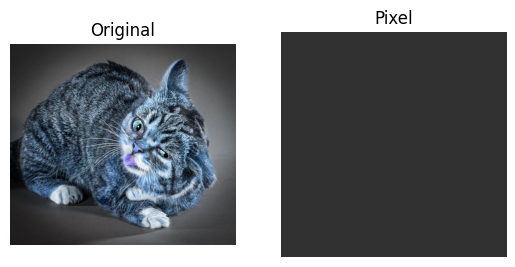

In [12]:
# вывод изображения на координатную прямую
plt.subplot(121)
plt.axis("off")
plt.imshow(image)
plt.title('Original')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_c)
plt.title('Pixel')

plt.show()
